<a href="https://colab.research.google.com/github/tal-rsg/analys_trade/blob/main/analys_btc_trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install ta
!pip install pandas_ta
!pip install bta-lib
!pip install finta
!pip install talib-binary

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=bcd401f7b4deeb283b38d1d616ce3af891c53e7323c1e7914e3114e1cc7edcfc
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=f71d8df0f1c47d7e8bde7f63ace270719e92367d4ecedefd5fb53b700d958228
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 2.3 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement talib-binary (from versions: none)
ERROR: No matching distribution found for talib-binary


In [ ]:
import pandas as pd
import yfinance as yf
from ta import add_all_ta_features
import pandas_ta
import btalib
#import talib
#from finta import TA

In [ ]:
data = yf.download('BTC-USD', start = '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = pd.DataFrame(data)

df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2020-01-01 00:00:00+00:00,7200.174316,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02 00:00:00+00:00,6985.470215,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03 00:00:00+00:00,7344.884277,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04 00:00:00+00:00,7410.656738,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05 00:00:00+00:00,7411.317383,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


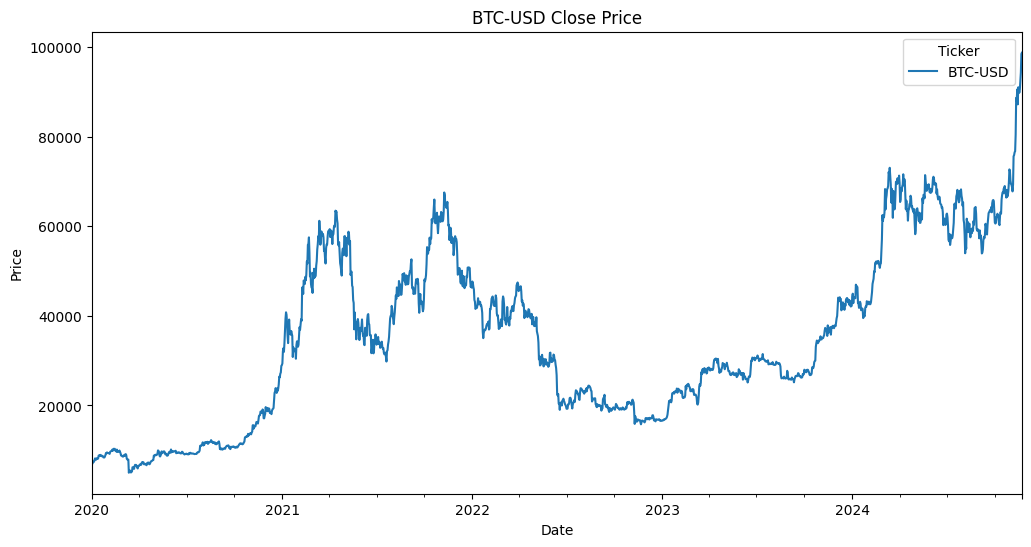

In [ ]:
# prompt: using df to create a line chart using atribute Close

import matplotlib.pyplot as plt

# Assuming 'Close' is the column you want to plot
df['Close'].plot(figsize=(12, 6))
plt.title('BTC-USD Close Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [ ]:
df_last = df.tail(1)

df_last

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2024-11-22 00:00:00+00:00,98785.84375,98785.84375,99481.390625,97319.523438,98453.703125,83532103680


In [ ]:
# prompt: Usando o dataframe df_last calcular o percentual da diferença dos atributos open e close

percentual_diff = ((df_last['Close'] - df_last['Open']) / df_last['Open']) * 100
percentual_diff

Ticker,BTC-USD
Date,
2024-11-22 00:00:00+00:00,0.337357


In [ ]:
df_acao_ita = yf.download('ITUB4.SA', start = '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_acao_ita.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA
Date,,,,,,
2020-01-02 00:00:00+00:00,30.934134,38.029999,38.029999,36.990002,37.279999,20666100
2020-01-03 00:00:00+00:00,30.608778,37.630001,38.240002,37.450001,37.500000,24891400
2020-01-06 00:00:00+00:00,30.153248,37.070000,37.580002,36.910000,37.549999,22294700
2020-01-07 00:00:00+00:00,29.453730,36.209999,37.240002,36.209999,37.070000,20000900
2020-01-08 00:00:00+00:00,28.973801,35.619999,36.810001,35.619999,36.450001,25980900


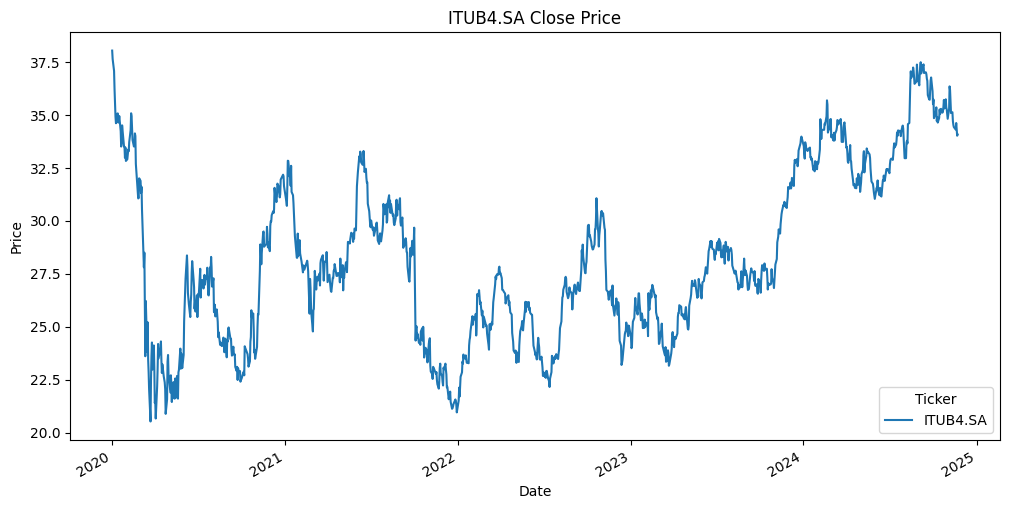

In [ ]:
# Assuming 'Close' is the column you want to plot
df_acao_ita['Close'].plot(figsize=(12, 6))
plt.title('ITUB4.SA Close Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

TypeError: unsupported format string passed to Series.__format__

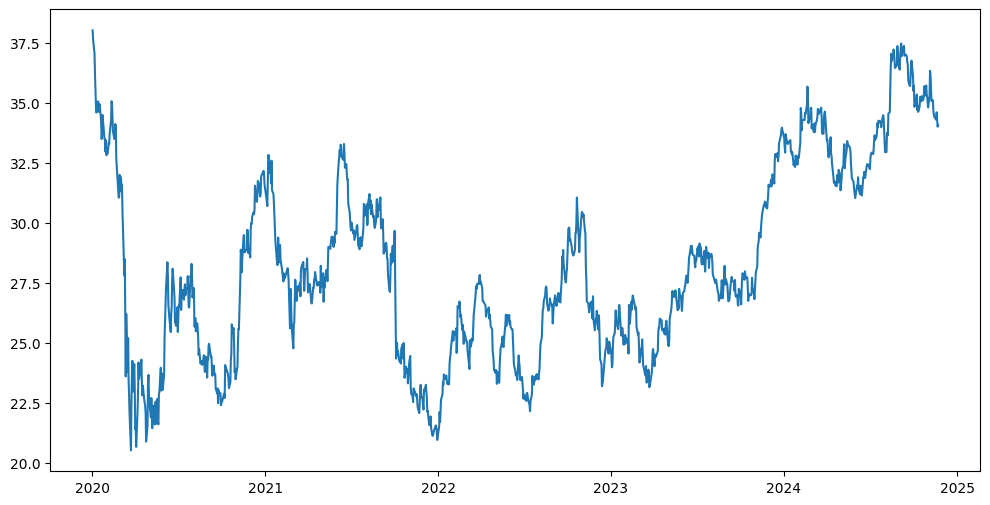

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for date formatting

# Assuming df_acao_ita is already defined and has 'Date' and 'Close' columns
# If 'Date' is the index, reset it to a column
if isinstance(df_acao_ita.index, pd.DatetimeIndex):
    df_acao_ita = df_acao_ita.reset_index()

# Format dates for better x-axis labels
df_acao_ita['Date'] = pd.to_datetime(df_acao_ita['Date'])
df_acao_ita['Date'] = df_acao_ita['Date'].dt.strftime('%Y-%m-%d')  # Format as YYYY-MM-DD

plt.figure(figsize=(12, 6))
plt.plot(df_acao_ita['Date'], df_acao_ita['Close'])

# Add labels for interaction (hovering)
for i, row in df_acao_ita.iterrows():
    plt.annotate(f"{row['Close']:.2f}", f"{row['Date']}", textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('ITUB4.SA Close Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()